# Predicting MBTI Based on Social Media Use
#### ECON 323 003 Quantitative Economic Modelling with Data Science Application

Group Members: Zaya Baatarzaya (45131414) | Kim Tan Palanca (98857568) | Vivian Vu (92958461) | Sophia Zhang (65921389)

# Introduction

Personality is defined as the characteristics and behavior of an individual that encompass their emotional patterns (American Psychology Association, 2022). Over time, many mechanisms and indicators have been discovered that break down the intricacies of a personality into general categories, one of which is the Myers-Briggs Type Indicator (MBTI) test. This personality instrument was developed by Isabel Briggs Myers and Katherine Briggs to bring true Carl Jung’s theory of personalities having basic differences.

There are four main divisions within the MBTI classification with two contrasting traits in each division. Depending on the traits satisfied by an individual, a four-letter code that combines one trait from each of the divisions will determine the individual’s personality type. The divisions and types are listed as follows:

**Table 1.** <br>
*Myers-Briggs Type Indicators*</p>


Category  | Traits | Description
------------- | ------------- | -------------
Favorite World  | Introvert (I) or Extrovert (E) |Preference to focus on the outer world or one’s inner world.
Information  | Sensing (S) or Intuition (N) | Preference to focus on and take in basic information or to interpret and add meaning.
Decisions | Thinking (T) or Feeling (F) |Preference to first look at logic and consistency or to first look at the people and special circumstances when making decisions.
Structure | Judging (J) or Perceiving (P) | Preference to get things decided or to stay open to new information and options when dealing with the outside world.

Note. The information in this table is taken from The Myers & Briggs Foundation. (2022, November). MBTI® basics. The Myers & Briggs Foundation. Retrieved April 3, 2023, from https://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/ 

There are many aspects of one’s behavior that determine their personality type including their writing style (Gupta et al., 2019). With the popularity of social media where people have the freedom to share their thoughts and stories, many individuals of varying personality types can arise in a single social media platform (Nisha et al., 2021). The dataset “(MBTI) Myers-Briggs Personality Type Dataset” by user Mitchell J presents data collected from the PersonalityCafe Forum which includes an individual’s MBTI and their last 50 posts on the forum. Utilizing the techniques learned in the ECON 323 course, this project aims to delve into the relationship between Myers Briggs Type Indicators (MBTI) and social media use. More specifically, to predict an individual’s MBTI based on their posts on social media.


# Cleaning

Before performing any analysis, it is critical to import the dataset and any packages used throughout the study. As mentioned in the introduction, the project will manipulate the “(MBTI) Myers-Briggs Personality Type Dataset” by user Mitchell J. Note that we first separated the original data set into two CSV files: one with only the MBTI type and another with only the posts. We then imported the two files into this notebook.

In [16]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

from bs4 import BeautifulSoup
import nltk
import string
from nltk.tokenize import RegexpTokenizer
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install wordcloud
from wordcloud import WordCloud

types = pd.read_csv("mbti_types.csv")
posts = pd.read_csv("mbti_posts.csv")

[nltk_data] Downloading package omw-1.4 to /home/jupyter/nltk_data...
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 5.7 MB/s eta 0:00:0000:0100:01


The analysis will only utilize the first post of each subject, thus each row in the `posts` CSV file will be seaparated by `"|||"`. Then, only the first column will be selected for the continuation of the investigation.

In [3]:
sep_posts = posts['posts'].str.split("\|\|\|", expand = True)
sample_posts = pd.DataFrame(sep_posts[0])

Lastly, the two files--`types` and `sample_posts`-- will concatenate into one dataframe using the `pd.concat` function.

In [4]:
data = pd.concat([types, sample_posts], axis=1)
data.columns = ['type', 'posts']
data

type                                              posts
0     INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ                                     'You're fired.
...    ...                                                ...
8670  ISFP       'https://www.youtube.com/watch?v=t8edHB_h908
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

Given the large number of observations in the dataset, it is beneficial first to understand the distribution of representation for each MBTI type to provide some awareness of any possible uneven distribution when concluding the analysis.

In [5]:
mbti_types = ['estj', 'entj', 'esfj', 'enfj', 
              'istj', 'isfj', 'intj', 'infj',
              'estp', 'entp', 'esfp', 'enfp', 
              'istp', 'intp', 'isfp', 'infp']

mbti=[]
for x in mbti_types:
    l = x.upper()
    mbti += [l]

print(mbti)

['ESTJ', 'ENTJ', 'ESFJ', 'ENFJ', 'ISTJ', 'ISFJ', 'INTJ', 'INFJ', 'ESTP', 'ENTP', 'ESFP', 'ENFP', 'ISTP', 'INTP', 'ISFP', 'INFP']


In [6]:
group_data = data.groupby('type')

n = []
for x in mbti:
    num_rows = len(group_data.get_group(f"{x}"))
    n += [num_rows]
    
n_obs = pd.DataFrame([np.array(mbti), np.array(n)]).T
n_obs.columns = ["type", "n obeservations"]


Text(0.5, 1.0, 'Representation of Each MBTI in The Dataset')

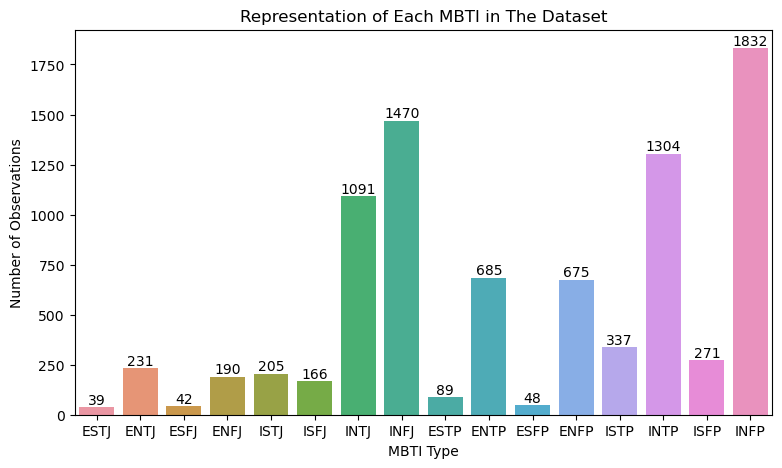

In [7]:
plt.subplots(figsize= (9,5))
ax = sns.countplot(data, x = "type", order=mbti)
ax.bar_label(ax.containers[0], labels = n)
plt.xlabel("MBTI Type")
plt.ylabel("Number of Observations")
plt.title("Representation of Each MBTI in The Dataset")

From this graph, it should be noted that there is a larger representation of the INTJ, INFJ, INTP, and INFP types while a much smaller representation of the ESTJ,ESFJ,ESTP, and ESFP types.

# Analysis

### Dividing testing and training

In [8]:
train, test = model_selection.train_test_split(data, test_size=0.3, random_state = 301)

#### Visualizing the Training Data Distribution

In [9]:
train

type                                              posts
3938  ISTP  'The ISTPs quiet moments didnt seem to bother ...
5687  INTP                                     'ok thank you!
3331  ISTP                                            ':wink:
7116  INTP  'Alright, I'm just bored. So I thought up a ga...
1425  INFP                                            'Golden
...    ...                                                ...
2365  INFP  'Not married, but I would to either elope or h...
4331  INTJ  'So my sick, stiff and introverted self starte...
3730  INTP  My son and I doing our mad faces at his birth ...
1604  ENTP  'Any place with craft beers. And sometimes mus...
1344  ISTP  'I don't know if my opinion would help at all ...

[6072 rows x 2 columns]

In [10]:
group_train = train.groupby('type')

n_train = []
for x in mbti:
    num_rows = len(group_train.get_group(f"{x}"))
    n_train += [num_rows]
    
n_train_obs = pd.DataFrame([np.array(mbti), np.array(n_train)]).T
n_train_obs.columns = ["type", "n obeservations"]

Text(0.5, 1.0, 'Representation of Each MBTI in Training Data')

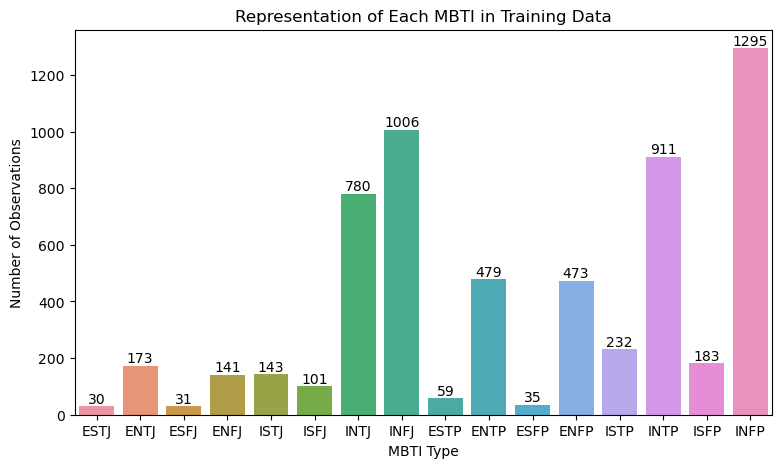

In [11]:
plt.subplots(figsize= (9,5))
ax = sns.countplot(train, x = "type", order = mbti)
ax.bar_label(ax.containers[0], labels = n_train)
plt.xlabel("MBTI Type")
plt.ylabel("Number of Observations")
plt.title("Representation of Each MBTI in Training Data")

## Word Counts of Posts from Each MBTI

The code below defines a function that will count the words of each post in the training data, excluding spaces and punctuations.

In [12]:
def word_count(t):
    num_words = []
    train_posts = t['posts']
    for tp in train_posts:
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(tp)
        num_words += [float(len(tokens))] 
    t["word_count"] = (num_words)
    t = t.drop(['posts'], axis = 1)
    return t
    
train_words = word_count(train)

The summary statistics of the word counts for the posts of each MBTI, along with a boxplot visualization are generated to provide a description on the average and range of the length of a post of each MBTI.

In [19]:
summary_stats = pd.DataFrame()
for m in mbti:
    stats = train_words.groupby("type").get_group(f"{m}").describe()
    summary_stats[f"{m}"] = stats

print(summary_stats)
    

            ESTJ        ENTJ       ESFJ        ENFJ        ISTJ        ISFJ  \
count  30.000000  173.000000  31.000000  141.000000  143.000000  101.000000   
mean   25.966667   29.075145  26.258065   27.872340   27.874126   29.099010   
std    13.220891   12.474631  14.280448   13.263188   12.785262   13.147247   
min     1.000000    1.000000   1.000000    1.000000    1.000000    1.000000   
25%    14.000000   21.000000  13.500000   15.000000   16.500000   19.000000   
50%    32.500000   35.000000  25.000000   33.000000   32.000000   35.000000   
75%    36.750000   38.000000  40.000000   39.000000   38.000000   39.000000   
max    42.000000   49.000000  47.000000   45.000000   45.000000   46.000000   

             INTJ         INFJ       ESTP        ENTP       ESFP        ENFP  \
count  780.000000  1006.000000  59.000000  479.000000  35.000000  473.000000   
mean    26.732051    27.677932  24.152542   25.870564  23.771429   28.236786   
std     13.330257    13.389669  14.796101   13.5

Text(0.5, 1.0, 'Boxplots of Word Counts of Social Media Posts Based on MBTI Type')

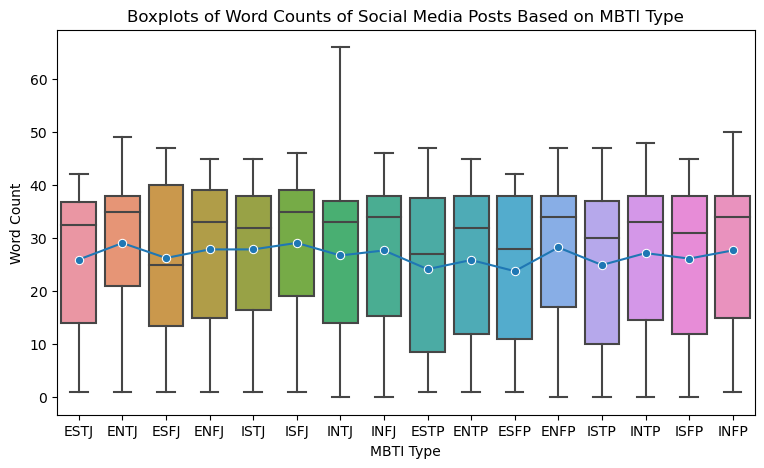

In [20]:
plt.subplots(figsize= (9,5))
box = sns.boxplot(data=train_words, x="type", y="word_count", order = mbti)
line = sns.lineplot(x=mbti, y=summary_stats.loc["mean"], sort = mbti, errorbar = None, marker = "o", estimator = 'mean', legend = True)
plt.xlabel("MBTI Type")
plt.ylabel("Word Count")
plt.title("Boxplots of Word Counts of Social Media Posts Based on MBTI Type")
           

### Word Clouds

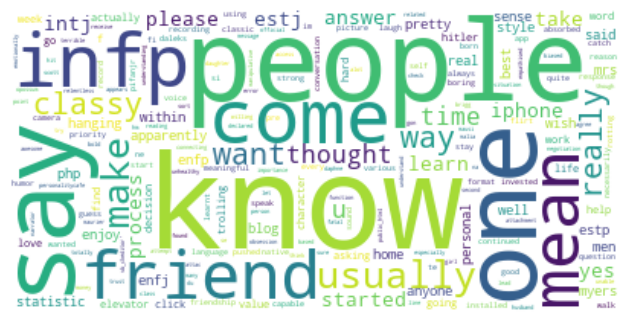

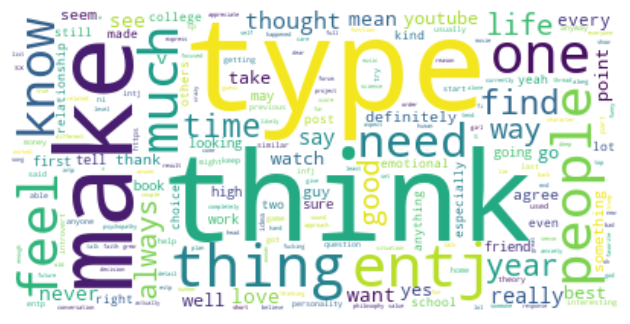

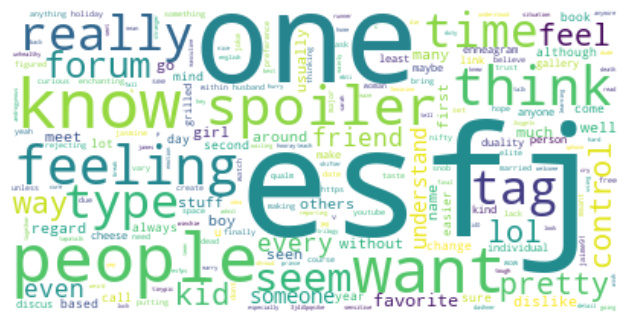

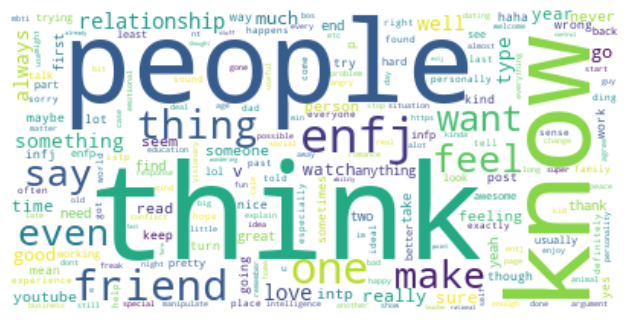

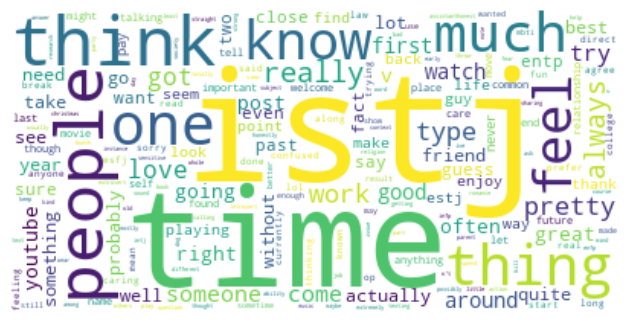

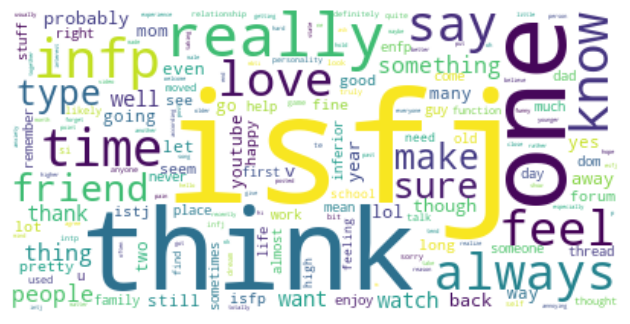

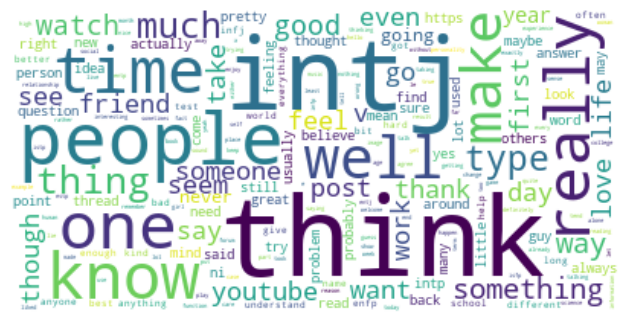

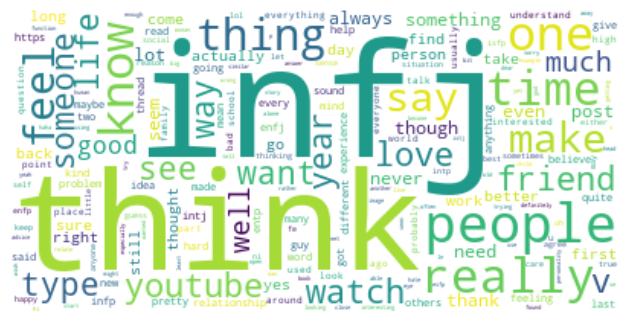

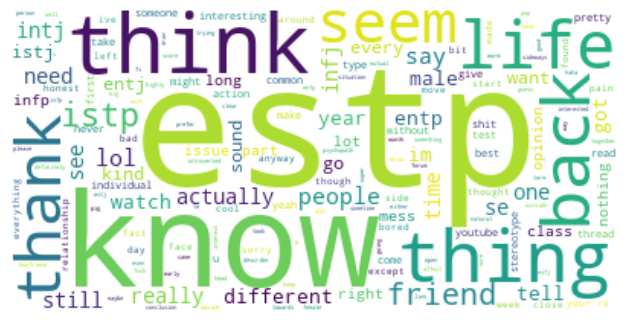

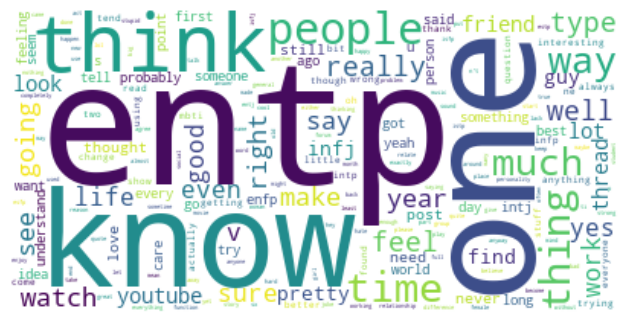

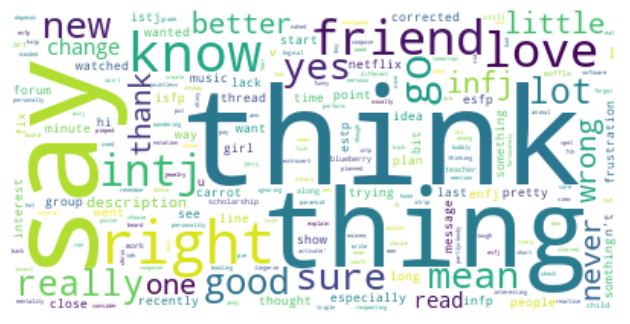

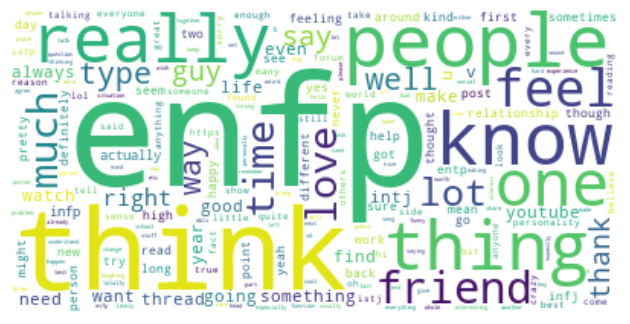

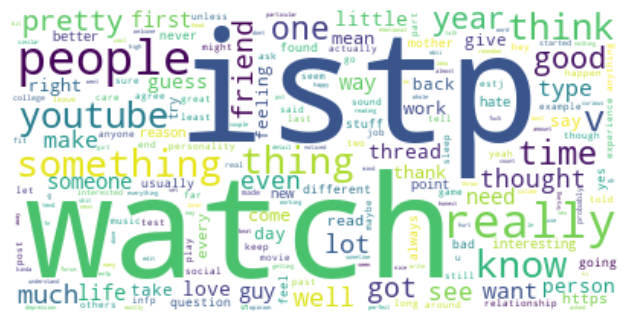

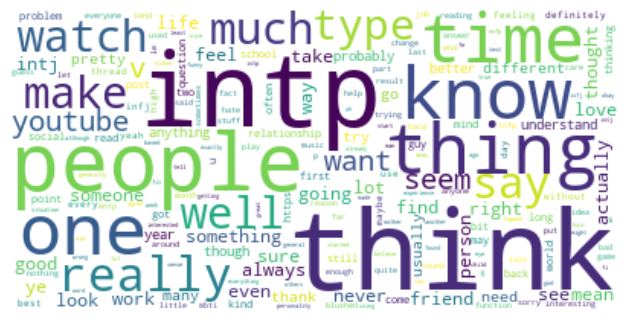

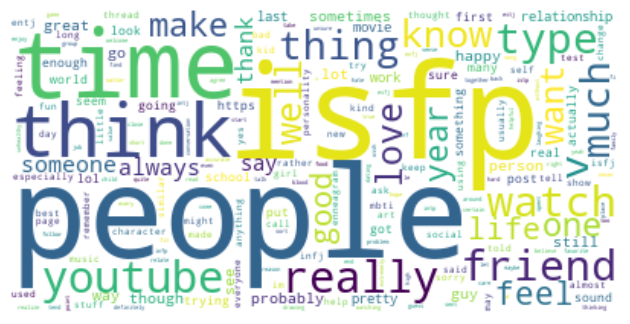

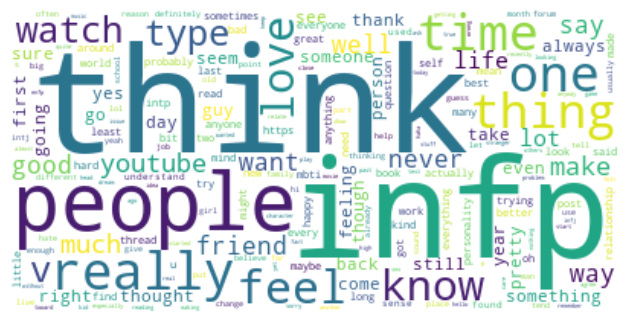

<Figure size 640x480 with 0 Axes>

In [17]:
# BAR CHART FOR 10 FREQUENTLY USED WORDS 

# Remove stopwords using the 'english' library which includes words such as (the, a, an, is, to)
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords = stopwords.union(set(string.punctuation))

# Remove Lemmatize words
wnl = nltk.WordNetLemmatizer()

# Defining a function that cleans, tokenizes, removes stopwords, and lemmatizes words in a text
def text_prep(txt):
    soup = BeautifulSoup(txt, "lxml")
    [s.extract() for s in soup('style')]
    txt=soup.text
    txt = txt.lower()
    tokens = [token for token in nltk.tokenize.word_tokenize(txt)]
    tokens = [token for token in tokens if not token in stopwords]
    tokens = [wnl.lemmatize(token) for token in tokens]
    if (len(tokens)==0):
        tokens = ["EMPTYSTRING"]
    return(tokens)

# Transforming a groupby object for ENTJ personality type to a list of words in order to use the FreqDist command
ENTJ = pd.Series(' '.join(group_data['posts'].get_group('ENTJ')).lower().split()).to_string(index = False)
ENTJ = text_prep(ENTJ)


# WORDCLOUD CONSISTING OF 10 FREQUENTLY USED WORDS - Individual code
#ENTJ_str = ' '.join(ENTJ)
#wordcloud_ENTJ = WordCloud(collocations = False, background_color = 'white').generate(ENTJ_str)
#plt.imshow(wordcloud_ENTJ, interpolation='bilinear')
#plt.axis("off")
#plt.show()


# BAR CHARTS SHOWING 10 FREQUENTLY USED WORDS BY EACH PERSONALITY TYPE - Individual code
#post_dict = wordcloud_ENTJ.process_text(ENTJ_str)
#word_freq={k: v for k, v in sorted(post_dict.items(),reverse=True, key=lambda item: item[1])}
#dist = pd.DataFrame(list(word_freq.items())[:10])
#dist.columns = ["Words", "Count"]
#dist.plot.bar(x='Words', y='Count', figsize=(12,4))

# To make a for loop that iterates over each persoanlity type and create a list of words
i=0
while i < 16:
    for t in mbti:
        group = pd.Series(' '.join(group_data['posts'].get_group(f"{t}")).lower().split()).to_string(index = False)
        group = text_prep(group)
        group_str = ' '.join(group)
        wordcloud = WordCloud(collocations = False, background_color = 'white').generate(group_str)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.tight_layout()
        plt.show()
        post_dict = wordcloud.process_text(group_str)
        word_freq={k: v for k, v in sorted(post_dict.items(),reverse=True, key=lambda item: item[1])}
        dist = pd.DataFrame(list(word_freq.items())[:10])
        dist.columns = ["Words", "Count"]
        plt.subplots_adjust(hspace=0.5,  wspace=0.5)
        i+=1
